# Analysis Notebook for Template Technology

In [ ]:
import os
import sys

import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb

sys.path.insert(0, os.path.abspath("../../../src"))

import tyche             as ty

C:\Users\rhanes\AppData\Local\anaconda3\envs\tyche2\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load data and compile technology models

Every decision context analysis in Tyche will begin with three commands: instantiate the `Designs` class, instantiate the `Investments` class, and compile the technology model functions and data in the `Designs` class. These commands read in and validate the necessary datasets, locate and verify the technology models, and prepare the technology models and data for use in further analyses.

Every decision context has a single Excel workbook containing seven datasets, one per sheet. In no particular order, these datasets are *indices*, *functions*, *designs*, *parameters*, *results*, *tranches*, and *investments*. When the `Designs` and `Investments` classes are instantiated in the code block immediately below, these datasets are automatically checked for internal consistency and completeness. If any of the datasets contain errors or are missing information, the code block below will fail with error messages detailing what data needs to be corrected and in which datasets.

After instantiating the `Designs` class, the `compile` method further processes the numerical datasets to identify any probability distributions in the data and ready them for use in ensemble simulations.

In [ ]:
designs = ty.Designs(path = '.',
                     name = 'template.xlsx')

investments = ty.Investments(path = '.',
                             name = 'template.xlsx')

designs.compile()

C:\Users\rhanes\GitHub\tyche\src\tyche\IO.py:341: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tranches.groupby('Category').Amount.count()[i] != tranches.groupby('Category').Amount.nunique()[i]
C:\Users\rhanes\GitHub\tyche\src\tyche\IO.py:341: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tranches.groupby('Category').Amount.count()[i] != tranches.groupby('Category').Amount.nunique()[i]
C:\Users\rhanes\GitHub\tyche\src\tyche\IO.py:341: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To 

## Evaluate Funding Tranches

The `evaluate_tranches` method in the code block below performs ensemble simulation (Monte Carlo) with the number of simulations defined with the `sample_count` parameter. For every simulation, values are sampled from all probability distributions present in the input datasets and are used to calculate corresponding Metric values as well as the built-in Cost. Results of these simulations are returned as shown in the second code block below.

In [ ]:
tranche_results = investments.evaluate_tranches(designs, sample_count=100).metrics

In [ ]:
tranche_results.xs(1, level="Sample", drop_level=False)

Ensemble simulation results can be further filtered down to show only aggregate results for a single Scenario. This is done in the code block below, in which the complete set of results is filtered down to only the Current State scenario and then average (mean) values are calculated for every Index.

In [ ]:
tranche_results.xs(
    'Component B0 Low Funding',
    level='Tranche',
    drop_level=False
).groupby(
    ['Technology', 'Index']
).mean(
    numeric_only=True
)

Here we demonstrate use of the Seaborn visualization package to compare the metric outcomes of each Scenario. Each of the four plots below shows a different metric, quantified as the difference between the Scenario's metric values (one value per simulation) and the average Current State metric value. The plots are put in order of increasing complexity of information presented.

In [ ]:
g = sb.boxplot(
    x="Tranche",
    y="Value",
    hue="Technology",
    data=tranche_results.xs(
        "Delta Labor",
        level="Index"
    ).reset_index(
    )[["Technology", "Category", "Tranche", "Value"]],
    order=[
        "Efficiency Low Funding"    ,
        "Efficiency Medium Funding",
        "Efficiency High Funding"    ,
        "Peripherals Low Funding"         ,
        "Peripherals Medium Funding"     ,
        "Peripherals High Funding"         ,
    ]
)
g.set(ylabel="Change in Labor per Unit F\nRelative to Current State",
      title="Labor Progress with R&D in Efficiency and Peripherals")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
g.axhline(y=0, linestyle=":", label='Current State')
g.legend()

In [ ]:
g = sb.violinplot(
    x="Tranche",
    y="Value",
    hue="Technology",
    data=tranche_results.xs(
        "Delta System Cost",
        level="Index"
    ).reset_index(
    )[["Technology", "Category", "Tranche", "Value"]],
    order=[
        "Component N Low Funding",
        "Component N Medium Funding",
        "Component N High Funding",
        "Component C Low Funding",
        "Component C Medium Funding",
        "Component C High Funding",
    ]
)
g.set(ylabel="Change in Annualized System Cost per Unit F\nRelative to Current State",
     title="System Cost Progress with Component C and N R&D")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
g.axhline(y=0, linestyle=":", label='Current State')
g.legend()

In [ ]:
diamonds = sb.load_dataset('diamonds', cache=True, data_home=None)
sb.boxenplot(x=diamonds["price"])

AttributeError: 'NoneType' object has no attribute 'index'

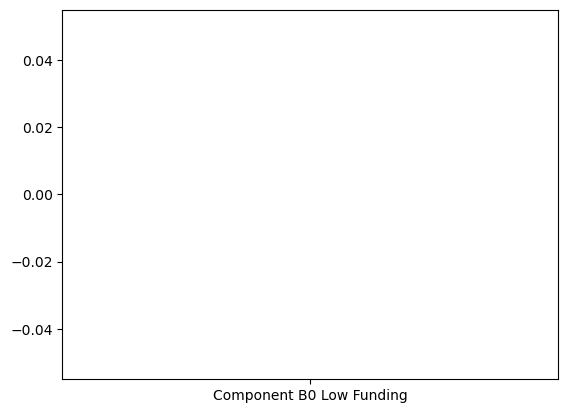

In [10]:
g = sb.boxenplot(
    x="Tranche",
    y="Value",
    dodge=True,
    cut=0,
    data=tranche_results.xs(
        ("Delta Overall Efficiency", "Technology A"),
        level=["Index", "Technology"]
    ).reset_index(
    )[["Tranche", "Value"]],
    order=[
        'Component B0 Low Funding',
        'Component B0 Medium Funding',
        'Component B0 High Funding',
        'Component B1 Low Funding',
        'Component B1 Medium Funding',
        'Component B1 High Funding',
        'Component B2 Low Funding',
        'Component B2 Medium Funding',
        'Component B2 High Funding',
    ]
)
g.set(ylabel="Change in Overall Efficiency\nRelative to Current State",
     title="Overall Efficiency Progress (Technology A Only)\n with Component B0, B1, B2 R&D")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
g.axhline(y=0, linestyle=":", label='Current State')
g.legend()

In [ ]:
g = sb.swarmplot(
    x="Tranche",
    y="Value",
    hue="Technology",
    data=tranche_results.xs(
        "Delta Environment",
        level="Index"
    ).reset_index()[["Technology", "Category", "Tranche", "Value"]],
    dodge=True,
    size=1.5,
    order=[
        "Efficiency Low Funding"    ,
        "Efficiency Medium Funding",
        "Efficiency High Funding"    ,
        "Peripherals Low Funding"         ,
        "Peripherals Medium Funding"     ,
        "Peripherals High Funding"         ,
    ]
)
g.set(ylabel="Change in Environmental Impact per Unit F\nRelative to Current State",
     title="Environmental Impact Progress with Efficiency and Peripherals R&D")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
g.axhline(y=0, linestyle=":", label='Current State')
g.legend()

## Evaluate the Investments

Each Investment is a combination of one or more Tranches, and as such represent the progress possible when invesments are made across multiple research Categories.

In [ ]:
investment_results = investments.evaluate_investments(designs, sample_count=100)

### Costs of investments

In [ ]:
investment_results.amounts

In [ ]:
investment_results.summary.xs(1, level="Sample", drop_level=False)

In [ ]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    hue="Technology",
    data=investment_results.metrics.xs(
        "Delta Overall Efficiency",
        level="Index"
    ).groupby(
        ["Technology","Investment", "Sample"]
    ).sum(
        numeric_only=True
    ).reset_index()[["Technology","Investment", "Value"]],
    order=[
        "Low Budget, All Categories"      ,
        "Medium Budget, All Categories"      ,
        "High Budget, All Categories",
        "Low Budget, Components Only"  ,
        "Medium Budget, Components Only"    ,
        "High Budget, Components Only"
    ]
)
g.set(ylabel="Overall Efficiency")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
g.axhline(y=0, linestyle=":", label='Current State')
g.legend()

In [ ]:
g = sb.boxenplot(
    x="Investment",
    y="Value",
    hue="Technology",
    data=investment_results.metrics.xs(
        "Delta Environment",
        level="Index"
    ).groupby(
        ["Technology","Investment", "Sample"]
    ).sum(
        numeric_only=True
    ).reset_index()[["Technology","Investment", "Value"]],
    order=[
        "Low Budget, All Categories"      ,
        "Medium Budget, All Categories"      ,
        "High Budget, All Categories",
        "Low Budget, Components Only"  ,
        "Medium Budget, Components Only"    ,
        "High Budget, Components Only"
    ]
)
g.set(ylabel="Environmental Impact per Unit F")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
g.axhline(y=0, linestyle=":", label='Current State')
g.legend()

In [ ]:
g = sb.violinplot(
    x="Investment",
    y="Value",
    hue="Technology",
    cut=0,
    data=investment_results.metrics.xs(
        "Delta Labor",
        level="Index"
    ).groupby(
        ["Technology","Investment", "Sample"]
    ).sum(
        numeric_only=True
    ).reset_index()[["Technology","Investment", "Value"]],
    order=[
        "Low Budget, All Categories"      ,
        "Medium Budget, All Categories"      ,
        "High Budget, All Categories",
        "Low Budget, Components Only"  ,
        "Medium Budget, Components Only"    ,
        "High Budget, Components Only"
    ]
)
g.set(ylabel="Labor per Unit F")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
g.axhline(y=0, linestyle=":", label='Current State')
g.legend()

In [ ]:
g = sb.swarmplot(
    x="Investment",
    y="Value",
    hue="Technology",
    size=2,
    dodge=True,
    data=investment_results.metrics.xs(
        "Delta System Cost",
        level="Index"
    ).groupby(
        ["Technology","Investment", "Sample"]
    ).sum(
        numeric_only=True
    ).reset_index()[["Technology","Investment", "Value"]],
    order=[
        "Low Budget, All Categories"      ,
        "Medium Budget, All Categories"      ,
        "High Budget, All Categories",
        "Low Budget, Components Only"  ,
        "Medium Budget, Components Only"    ,
        "High Budget, Components Only"
    ]
)
g.set(ylabel="Change in Annualized System Cost")
g.set_xticklabels(g.get_xticklabels(), rotation=30, ha='right', rotation_mode='anchor')
g.axhline(y=0, linestyle=":", label='Current State')
g.legend()
pl.savefig('change-system-cost.svg')

## Multi-objective decision analysis.

### Compute costs and metrics for tranches.

Tranches are atomic units for building investment portfolios. Evaluate all of the tranches, so we can assemble them into investments (portfolios).

In [ ]:
tranche_results = investments.evaluate_tranches(designs, sample_count=100)

Display the cost of each tranche.

In [ ]:
tranche_results.amounts

Display the metrics for each tranche.

In [ ]:
tranche_results.summary

## Optimization: Setup

Fit a response surface to the results.

The response surface interpolates between the discrete set of cases provided in the expert elicitation. This allows us to study funding levels intermediate between those scenarios.

In [ ]:
evaluator = ty.Evaluator(tranche_results)

Here are the categories of investment and the maximum amount that could be invested in each:

In [ ]:
evaluator.max_amount

Create an `optimizer` object to define and solve single- and multi-objective optimization problems.

In [ ]:
optimizer = ty.EpsilonConstraintOptimizer(evaluator)

## Optimization: Single Objective

Given a budget of \\$5M USD, what's the highest possible increase in overall efficiency?

In [ ]:
efficiency_5M = optimizer.opt_slsqp(
    'Delta Overall Efficiency', # Name of the metric to be optimized
    sense = 'max'             , # Should the metric be minimized or maximized?
    total_amount = 5e6        , # What's the budget (USD)?
    statistic    = 'mean'     , # What statistic should be used in the optimization?
)
print(efficiency_5M.exit_message)
if efficiency_5M.exit_code == 0:
    print('\nInvestment by Category:')
    print(np.round(efficiency_5M.amounts))
    print('\nImpact on Metrics:')
    print(efficiency_5M.metrics.apply(np.round, decimals=2))

Looking under Impact on Metrics, we see that the highest possible increase in overall efficiency with a budget of \\$5M is 0.10. To achieve this increase, funding is allocated as shown under Investment by Category: Component B1 and Efficiency are funded equally. No funding is allocated to any other category.

Can we achieve a higher increase in overall efficiency if we increase the budget from \\$5M to \\$8M?

In [ ]:
efficiency_8M = optimizer.opt_slsqp(
    'Delta Overall Efficiency', # Name of the metric to be optimized
    sense = 'max'             , # Should the metric be minimized or maximized?
    total_amount = 8e6        , # What's the budget (USD)?
    statistic    = 'mean'     , # What statistic should be used in the optimization?
    maxiter=100,
)
print(efficiency_8M.exit_message)
if efficiency_8M.exit_code == 0:
    print('\nInvestment by Category:')
    print(np.round(efficiency_8M.amounts))
    print('\nImpact on Metrics:')
    print(efficiency_8M.metrics.apply(np.round, decimals=2))

With an additional \\$3M in the budget, the increase in overall efficiency is 0.13 (compare to 0.10 with the lower budget). The funding allocation has also changed: Component B1 now has the highest funding allocation, followed by Efficiency, Peripherals, and finally Component B. No other category receives funding.

Note that in the code block above, an additional optimization parameter was added: `maxiter` was set to 100. This parameter sets the number of iterations that the algorithm is allowed to perform before terminating, in the case that an optimum is not found. By default, `maxiter` is 50, but this problem cannot solve within 50 iterations. By allowing for 100 iterations, the algorithm was able to find an optimum.

Returning to the \\$5M budget, what's the largest possible decrease in environmental impacts?

Note we are now interested in minimizing the metric being optimized. In the previous two problems, we were interested in increasing efficiency and so we maximized the metric.

In [ ]:
env_5M = optimizer.opt_slsqp(
    'Delta Environment', # Name of the metric to be optimized
    sense = 'min'      , # Minimize the environmental impact metric
    total_amount = 5e6 , # Set the budget at 5 million USD
    statistic = 'mean' , # Use the neutral mean statistic
)
print(env_5M.exit_message)
if env_5M.exit_code == 0:
    print('\nInvestment by Category:')
    print(np.round(env_5M.amounts))
    print('\nImpact on Metrics:')
    print(env_5M.metrics.apply(np.round, decimals=2))

This is the same optimum that was found when efficiency was maximized, indicating that this funding allocation represents the best possible performance in both metrics.

In [ ]:
lab_5M = optimizer.opt_slsqp(
    'Delta Labor', # Name of the metric to be optimized
    sense = 'min'      , # Minimize the environmental impact metric
    total_amount = 5e6 , # Set the budget at 5 million USD
    statistic = 'mean' , # Use the neutral mean statistic
)
print(lab_5M.exit_message)
if lab_5M.exit_code == 0:
    print('\nInvestment by Category:')
    print(np.round(lab_5M.amounts))
    print('\nImpact on Metrics:')
    print(lab_5M.metrics.apply(np.round, decimals=2))

In [ ]:
cos_5M = optimizer.opt_slsqp(
    'Delta System Cost', # Name of the metric to be optimized
    sense = 'min'      , # Minimize the environmental impact metric
    total_amount = 4.85e6 , # Set the budget at 5 million USD
    statistic = 'mean' , # Use the neutral mean statistic
)
print(cos_5M.exit_message)
if cos_5M.exit_code == 0:
    print('\nInvestment by Category:')
    print(np.round(cos_5M.amounts))
    print('\nImpact on Metrics:')
    print(cos_5M.metrics.apply(np.round, decimals=2))

## Optimization: Multi-Objective via $\epsilon$ constraint method

Virtually all decision contexts analyzed with Tyche will involve multiple, probably competing or conflicting, objectives (metrics). The $\epsilon$ constraint method is one way to include multiple metrics in a single objective problem, instead of the single-objective problems demonstrated above. In the $\epsilon$ constraint method, a single metric is chosen to be maximized or minimized subject to constraints on one or more additional metrics that represent desired progress.

For instance, suppose we want to find out how much we can increase efficiency with a \\$5M budget, but we simultaneously want to reduce the environmental impact by at least 5 units per unit of output F. Using the $\epsilon$ constraint method built into Tyche, this problem is set up and solved in the code block below.

In [ ]:
lab_env_5M = optimizer.opt_slsqp(
    metric = 'Delta Labor',
    sense = 'min', 
    total_amount = 5e6,
    eps_metric = {'Delta Environment': 
                  {'limit': -4.45,
                   'sense': 'upper'}},
)

print(lab_env_5M.exit_message)
if lab_env_5M.exit_code == 0:
    print('\nInvestment by Category:')
    print(np.round(lab_env_5M.amounts))
    print('\nImpact on Metrics:')
    print(lab_env_5M.metrics.apply(np.round, decimals=2))